In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading Data
data = pd.read_csv('billionaires_data_cleaned.csv',encoding='latin-1')
data2 = pd.read_csv('billionaires_personal_data.csv',encoding='latin-1')

In [3]:
#Reading Data
data.sample(5)

Unnamed: 0                                              Image  Rank  \
2171        2171  https://specials-images.forbesimg.com/imageser...  2172   
757          757  https://specials-images.forbesimg.com/imageser...   758   
1455        1455  https://specials-images.forbesimg.com/imageser...  1456   
2483        2483  https://specials-images.forbesimg.com/imageser...  2484   
2130        2130  https://specials-images.forbesimg.com/imageser...  2131   

                 Name  Net_Worth   Age                          Source  \
2171    Tingdong Yang        1.3  63.0                         Brewery   
757     Tsai Cheng-ta        3.9  73.0                         Finance   
1455       Marc Lasry        2.1  62.0                     Hedge funds   
2483    Masaru Wasami        1.1  78.0                       logistics   
2130  Boris Rotenberg        1.4  66.0  Construction, pipes, chemicals   

            Country                    Industry   Sex  
2171          China             Food & Beverage  Male  
757          Taiwan       Finance & Investments  Male  
1455  United States       Finance & Investments  Male  
2483          Japan                   Logistics  Male  
2130         Russia  Construction & Engineering  Male

In [4]:
data2.sample(5)

Unnamed: 0                     name    Citizenship   Marital Status  \
507        507.0  Stefan Reimann-Andersen        Germany              NaN   
1550      1550.0          Sarah MacMillan  United States         Divorced   
1027      1027.0              Guanghe Qiu          China          Married   
624        624.0        Guenther Fielmann        Germany  In Relationship   
375        375.0   Sofie Kirk Kristiansen        Denmark              NaN   

     Education College/University     Empire  2014  2015  2016  2017  2018  \
507        NaN                NaN        NaN   3.3   4.0   4.4   3.7   4.4   
1550       NaN                NaN        NaN   NaN   1.6   1.5   1.9   2.0   
1027       NaN                NaN  Self Made   2.7   3.6   3.4   3.3   3.6   
624        NaN                NaN  Self Made   3.7   4.4   5.3   5.3   6.3   
375        NaN                NaN        NaN   NaN   NaN   NaN   NaN   5.4   

      2019  2020  2021  2022  2023  
507    3.7   4.7   3.8   5.8   5.4  
1550   1.9   1.3   1.7   2.4   1.9  
1027   3.6   2.8   4.0   3.4   3.0  
624    5.1   4.1   6.0   4.7   3.9  
375    4.7   6.1   8.7   8.2   6.7

# Summary of the Data

This Data is about more than 2600 Billionaires that is listed on "Forbes Real Time Billionaire" of year 2023. This Dataset provides some information about billionaires. The Information in both datasets was scraped on 15th August.

## Columns Description

#### **Table** -> `data`:

- `Image` - Image of billionaires in small size as link.

- `Rank` -  Billionaires's rank based on their worth value calculated by forbes.

- `Name` - Name of the billionaire.

- `Net-Worth` - This column contains the net worth of billionaire in real-time in billion dollar.

- `Age` - Age of the billionaire.

- `Source` - This column hold company name through which they earn money.

- `Country` - In which country they belong to or their company.

- `Sex` - Sex category of that billionaire.


#### **Table** -> `data2`:


- `Name` - Name of the billionaire.

- `Citizenship` - Name of the country, where they have got the civil rights.

- `Marital Status` - Marital Status of Billionaires..

- `Education` - What they have studied.

- `College/University` - Which college/University they have studied..

- `Column 2014 to 2023` - Between column 2014 to 2023, it shows the wealth history of the billionaire.


In [5]:
data2.isnull().sum()

Unnamed: 0               1
name                     1
Citizenship              1
Marital Status         509
Education             1201
College/University    1175
Empire                 827
2014                  1522
2015                  1369
2016                  1297
2017                  1148
2018                   975
2019                   878
2020                   817
2021                   419
2022                   301
2023                   283
dtype: int64

## Issues with Dataset

#### 1. table -> data
   - `Unnamed-0 Column` - It should not be there.
   
   - `Name Column` - Name has . in end Remove it
   
   - `Age Column` - This column has some NaN values. Leaving it as it is. Convert age column to 'Int16'
   
#### 2. table -> data2

   - `Unnamed-0 Column` - It should not be there.
   
   - `Name Column` - Name has . in end and , in between remove it.
   
   - `Marital Status, Education, College/University` has NaN values. Fill all NaN values with 'no data'.
   
   - `Columns 2014 to 2023` - These columns has also NaN values. Leave it as it is. Because we have no data.
   
Name in data and data2 dataset is incorrect = ([Luis Friaz, Luiz Friaz], ['Fang Wei, Wei Fang']) Correct it



After all the Cleaning, Merge(left) these both the datasets and create two final datasets.
1. First Dataset would have information about billionaires.
2. Second Dataset would have information about their wealth history. 2014 to 2023.

## Data Cleaning - Data Table

In [6]:
# Dropping Unnamed-0 column
data.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
# Removing . from end of Name.
data['Name'] = data['Name'].str.replace('\.$','',regex=True)

In [8]:
# Converting Age datatype to Integer.
data['Age'] = data['Age'].astype('Int16')

In [9]:
# Correcting Name
data[data['Name'].str.contains('Luis')]

Image  Rank  \
336   https://specials-images.forbesimg.com/imageser...   337   
1921  https://specials-images.forbesimg.com/imageser...  1922   

                       Name  Net_Worth  Age           Source   Country  \
336   Luis Carlos Sarmiento        7.3   90          Banking  Colombia   
1921             Luis Frias        1.5   60  mobile payments    Brazil   

                   Industry   Sex  
336   Finance & Investments  Male  
1921             Technology  Male

In [10]:
data.loc[1921,'Name'] = 'Luiz Frias'

In [11]:
data[data['Name'] == 'Fang Wei']

Image  Rank      Name  \
622  https://specials-images.forbesimg.com/imageser...   623  Fang Wei   

     Net_Worth  Age Source Country       Industry   Sex  
622        4.5   49  Steel   China  Manufacturing  Male

In [12]:
# Replace the Name with Wei Fang
data.loc[622, 'Name'] = 'Wei Fang'

## Data Cleaning - Data2 Table

In [13]:
# Dropping Unnamed-0 column
data2.drop(columns=['Unnamed: 0'], inplace=True)

In [14]:
# Removing , from name
data2['name'] = data2['name'].str.replace(',','').str.replace('\.$','',regex=True)

In [15]:
# Filling NaN values

In [16]:
data2.update(data2[['Marital Status', 'Education', 'College/University','Empire']].fillna('no data'))

In [17]:
## Merging Both datasets.

In [18]:
final = data.merge(data2, how='left', left_on='Name', right_on='name')

In [19]:
final.drop(columns = 'name', inplace=True)

In [20]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2607 entries, 0 to 2606
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               2607 non-null   object 
 1   Rank                2607 non-null   int64  
 2   Name                2607 non-null   object 
 3   Net_Worth           2607 non-null   float64
 4   Age                 2552 non-null   Int16  
 5   Source              2607 non-null   object 
 6   Country             2607 non-null   object 
 7   Industry            2607 non-null   object 
 8   Sex                 2607 non-null   object 
 9   Citizenship         2607 non-null   object 
 10  Marital Status      2607 non-null   object 
 11  Education           2607 non-null   object 
 12  College/University  2607 non-null   object 
 13  Empire              2607 non-null   object 
 14  2014                1088 non-null   float64
 15  2015                1241 non-null   float64
 16  2016  

In [21]:
final.iloc[:,[2, 14,15,16,17,18,19,20,21,22,23]]

Name  2014  2015  2016  2017   2018   2019   2020   2021  \
0           Elon Musk   8.4  12.0  10.7  13.9   19.9   22.3   24.6  151.0   
1     Bernard Arnault  33.5  37.2  34.0  41.5   72.0   76.0   76.0  150.0   
2          Jeff Bezos  32.0  34.8  45.2  72.8  112.0  131.0  113.0  177.0   
3       Larry Ellison  48.0  54.3  43.6  52.2   58.5   62.5   59.0   93.0   
4      Warren Buffett  58.2  72.7  60.8  75.6   84.0   82.5   67.5   96.0   
...               ...   ...   ...   ...   ...    ...    ...    ...    ...   
2602   Alexander Sixt   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   
2603     David Fattal   NaN   NaN   NaN   NaN    NaN    1.0    NaN    NaN   
2604    Wang Mingwang   NaN   NaN   NaN   NaN    NaN    NaN    NaN    1.4   
2605  Wang Shih-Chung   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   
2606    Zhong Peifeng   NaN   NaN   NaN   NaN    NaN    NaN    NaN    1.1   

       2022   2023  
0     219.0  180.0  
1     158.0  211.0  
2     171.0  114.0  
3     106.0  107.0  
4     118.0  106.0  
...     ...    ...  
2602    1.3    1.2  
2603    1.3    NaN  
2604    1.7    1.3  
2605    NaN    NaN  
2606    1.7    NaN  

[2607 rows x 11 columns]

In [22]:
# Creating Two Seperate DataFrame
wealth_data = final.iloc[:,[2, 14,15,16,17,18,19,20,21,22,23]]
data = final.iloc[:,:14]

In [23]:
# wealth_data.to_csv('wealth_data.csv',encoding='utf-8')
# data.to_csv('billionaire_final_data.csv',encoding='utf-8')

## Basic Information About Data

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2607 entries, 0 to 2606
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               2607 non-null   object 
 1   Rank                2607 non-null   int64  
 2   Name                2607 non-null   object 
 3   Net_Worth           2607 non-null   float64
 4   Age                 2552 non-null   Int16  
 5   Source              2607 non-null   object 
 6   Country             2607 non-null   object 
 7   Industry            2607 non-null   object 
 8   Sex                 2607 non-null   object 
 9   Citizenship         2607 non-null   object 
 10  Marital Status      2607 non-null   object 
 11  Education           2607 non-null   object 
 12  College/University  2607 non-null   object 
 13  Empire              2607 non-null   object 
dtypes: Int16(1), float64(1), int64(1), object(11)
memory usage: 272.5+ KB


In [25]:
data.columns

Index(['Image', 'Rank', 'Name', 'Net_Worth', 'Age', 'Source', 'Country',
       'Industry', 'Sex', 'Citizenship', 'Marital Status', 'Education',
       'College/University', 'Empire'],
      dtype='object')

In [26]:
data.isnull().sum()

Image                  0
Rank                   0
Name                   0
Net_Worth              0
Age                   55
Source                 0
Country                0
Industry               0
Sex                    0
Citizenship            0
Marital Status         0
Education              0
College/University     0
Empire                 0
dtype: int64

In [27]:
data.describe()

Rank    Net_Worth        Age
count  2607.000000  2607.000000     2552.0
mean   1302.381281     4.865401  65.469044
std     752.086481    11.316878  13.376137
min       1.000000     1.000000       19.0
25%     651.500000     1.500000       56.0
50%    1302.000000     2.400000       66.0
75%    1946.000000     4.350000       75.0
max    2606.000000   220.700000      101.0

# Data Analysis

## Q-1 : Name the world's youngest billionaire.

In [28]:
# Worlds Youngest Billionaire
data[data['Age'] == data['Age'].min()][['Name','Age','Source','Industry']]

Name  Age         Source               Industry
746   Clemente Del Vecchio   19     Eyeglasses       Fashion & Retail
2430         Kim Jung-youn   19  Online gaming  Media & Entertainment

### Conclusion

**Clemente Del Vecchio** and **Kim Jung-youn** is the world's youngest billionaire, and their age is **19.**

## Q-2 : What are the top 10 sources of income for billionaires?

In [29]:
# Source of Income of top 10 billionaires.
income_source = data.sort_values('Net_Worth', ascending = False).head(10)[['Name','Net_Worth','Source']]

In [30]:
source = income_source['Source']
worth = income_source['Net_Worth']

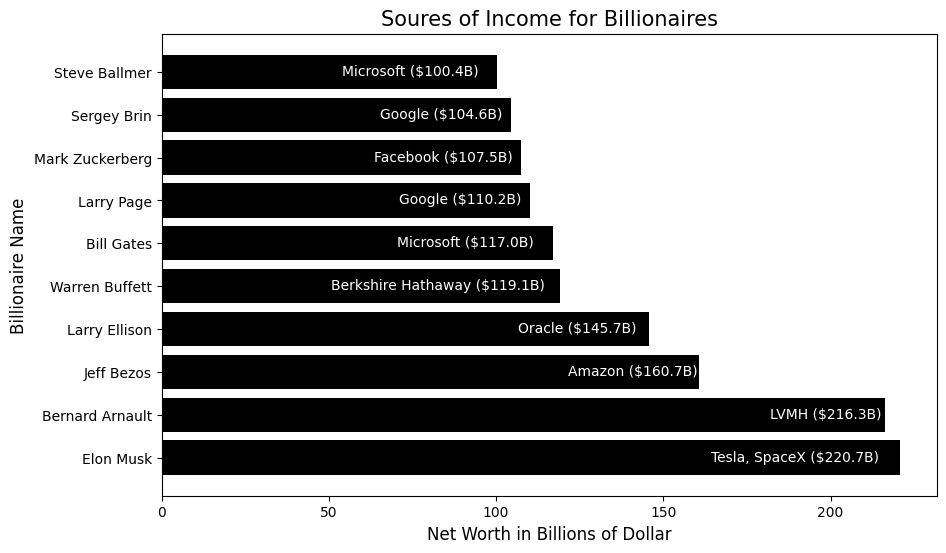

In [31]:
plt.figure(figsize=(10, 6))
bars = plt.barh(income_source['Name'],income_source['Net_Worth'], color = 'black')
for i, bars in enumerate(bars):
    plt.text(bars.get_width() - len(f'{source[i]} (${worth[i]}B)')*2.45, bars.get_y() + bars.get_height()/2.5, f'{source[i]} (${worth[i]}B)', color = 'white')
    
plt.title('Soures of Income for Billionaires', size=15)   
plt.xlabel('Net Worth in Billions of Dollar', size=12)
plt.ylabel('Billionaire Name', size=12)
plt.show()    

### Conclusion

Sources of Income of top 10 billionaires are :- 
    1. Tesla, SpaceX
    2. LVMH
    3. Amazon
    4. Oracle
    5. Berkshire Hathway
    6. Mocrosoft
    7. Facebook
    8. Google

## Q-3 : What are the top 5 industries for billionaires.

In [32]:
top_industry = data.groupby('Industry')['Net_Worth'].mean().sort_values(ascending=False).head(5)
top_industry

Industry
Automotive          7.731081
Technology          7.025078
Fashion & Retail    6.653962
Telecom             6.379310
Logistics           6.113158
Name: Net_Worth, dtype: float64

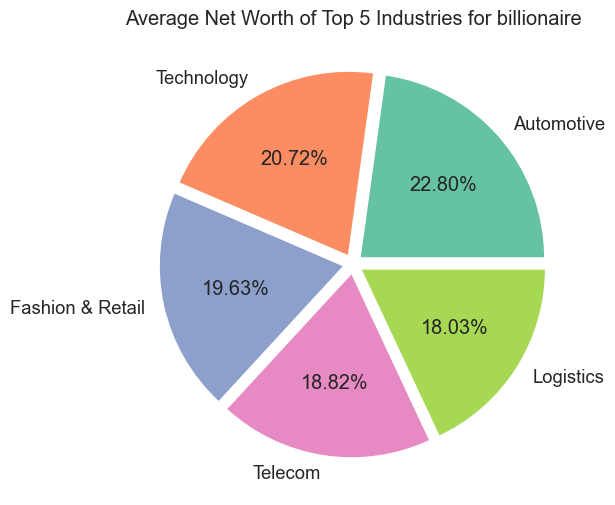

In [33]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(6,6))
plt.pie(labels=top_industry.index, 
        x=top_industry.values, 
        autopct='%1.2f%%',
        colors=sns.color_palette('Set2'),
        explode=[0.05, 0.05, 0.05, 0.05, 0.05])
plt.title('Average Net Worth of Top 5 Industries for billionaire')
plt.show()

### Conclusion

Top 5 Industries for Billionaires are -
   1. Automotive
   2. Technology
   3. Fashion & Retail
   4. Telecom
   4. Metals & Mining

## Q-4 : How has a Wealth of Billionaire Changed overtime?

In [34]:
name_list = data['Name'].to_list()
def chart(name):
    # Extacting wealth data with name
    worth = wealth_data[wealth_data['Name'] == name].iloc[:,1:].transpose().reset_index()
    # Year and worth value in a list.
    year = worth.iloc[:,0].to_list()
    value = worth.iloc[:,1].to_list()
    
    plt.figure(figsize=(12,5))
    plt.plot(year, value,linestyle='solid', color='black', linewidth=2, marker = "o", markersize=8)
    for i in range(len(worth)):
        plt.annotate(value[i], (year[i], value[i]))  
    plt.title('Billionaire Wealth by Year', size=20)
    plt.xlabel('Year')
    plt.ylabel('Net Worth in Billions')
    plt.show()
# This function expecting, defined function and name's list    
widgets.interact(chart, name=name_list);    

interactive(children=(Dropdown(description='name', options=('Elon Musk', 'Bernard Arnault', 'Jeff Bezos', 'Lar…

## How has the net worth of the top 5 billionaires changed over the years?

In [35]:
data.sort_values('Net_Worth', ascending=False).head()['Name']

0          Elon Musk
1    Bernard Arnault
2         Jeff Bezos
3      Larry Ellison
4     Warren Buffett
Name: Name, dtype: object

In [83]:
# top_5_worth_data = wealth_data.head().transpose()
# top_5_worth_data.columns = top_5_worth_data.iloc[0]
# top_5_wealth = top_5_worth_data.iloc[1:]
# top_5_wealth.to_csv('five.csv',encoding='utf-8')

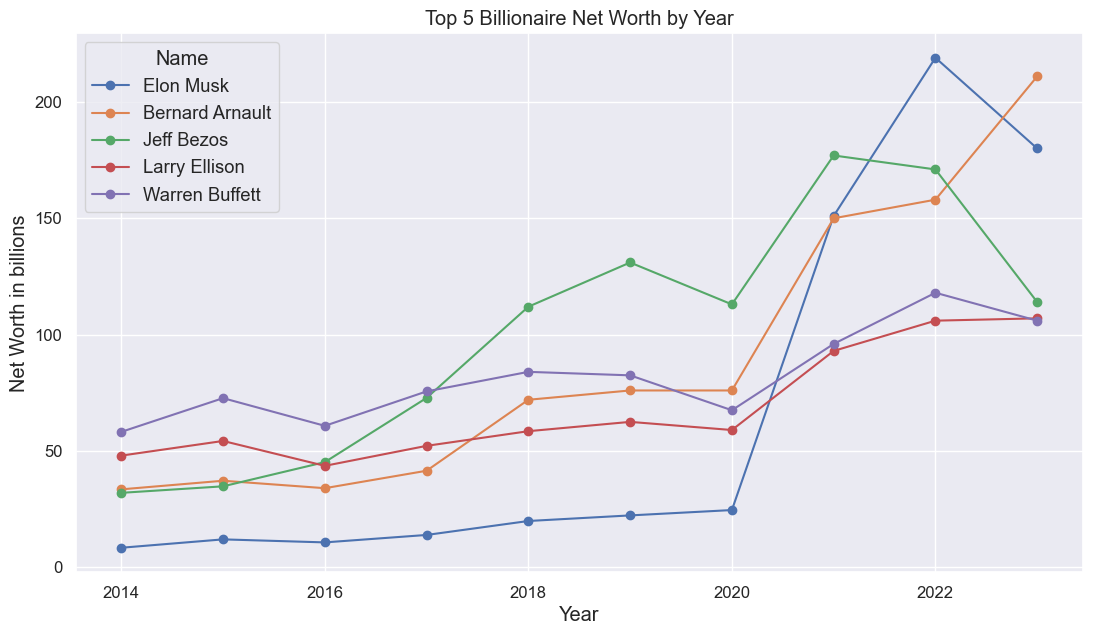

In [36]:
top_5_worth_data = wealth_data.head().transpose()
top_5_worth_data.columns = top_5_worth_data.iloc[0]
plt.figure(figsize=(13,7))
top_5_worth_data.iloc[1:].plot(kind='line', fontsize=12,style='o-',
                               ax=plt.gca(), title='Top 5 Billionaire Net Worth by Year')
plt.xlabel('Year')
plt.ylabel('Net Worth in billions')
plt.show()

### Conclusion

Net Worth of top 5 billionaires have increased overtime, but after **2020**, net worth of **Elon Musk and Bernard Arnault** has rapidly increased.

## Which country has the highest number of billionaires?

In [37]:
data['Country'].value_counts().head(1)

Country
United States    756
Name: count, dtype: int64

### Conclusion

The United States is the country with the most billionaires, with a total of **756 billionaires**.

## Which Industry has the highest number of billionaires?

In [38]:
data['Industry'].value_counts().head(1)

Industry
Finance & Investments    380
Name: count, dtype: int64

### Conclusion

**Finance & Investments** is the Industry with the highest number of billionaires i.e. **380**.

## Top 10 Countries with highest Number of Bilionaires.

In [39]:
billionaires_count = data['Country'].value_counts().head(10).reset_index()
#billionaires_count.rename(columns= {'Country':'Count','count':'Country'}, inplace=True)
billionaires_count

Country  count
0   United States    756
1           China    442
2           India    177
3         Germany    124
4          Russia    105
5       Hong Kong     66
6          Canada     65
7           Italy     63
8          Brazil     58
9  United Kingdom     54

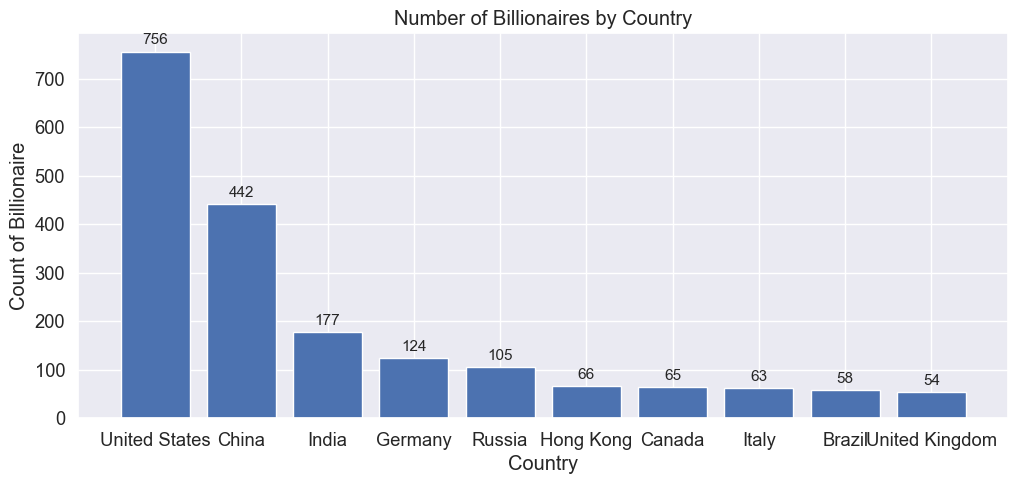

In [40]:
plt.figure(figsize=(12,5))
bar = plt.bar(billionaires_count['Country'], billionaires_count['count'])
ax = plt.gca()
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=11, padding=3)
plt.title('Number of Billionaires by Country')    
plt.xlabel('Country')
plt.ylabel('Count of Billionaire')
plt.show()  

In [41]:
map_data = data['Country'].value_counts().reset_index()
#map_data.rename(columns= {'index':'Country','Country':'Count'}, inplace=True)

In [42]:
map_data

Country  count
0   United States    756
1           China    442
2           India    177
3         Germany    124
4          Russia    105
..            ...    ...
72  Liechtenstein      1
73        Iceland      1
74         Belize      1
75       Portugal      1
76         Panama      1

[77 rows x 2 columns]

In [43]:
fig = px.choropleth(map_data,
                    locations='Country',
                    color='count',
                    locationmode='country names',scope='world',)
fig.update_layout(
    
    title_text='Billionaires Count By Country',
    title_x = 0.5,
    title_font=dict(size=24),
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'))
fig.show()

### Conclusion

**United States** is the country with highest number of billionaires, then comes **China and then India, and so on.**

## Top 10 Industries with highest Number of Bilionaires.

In [44]:
Industry_count = data['Industry'].value_counts().head(10).reset_index()
#Industry_count.rename(columns= {'index':'Industry','Industry':'Count'}, inplace=True)
Industry_count

Industry  count
0  Finance & Investments    380
1             Technology    319
2          Manufacturing    304
3       Fashion & Retail    265
4        Food & Beverage    204
5             Healthcare    193
6            Real Estate    193
7            Diversified    185
8                 Energy     96
9  Media & Entertainment     95

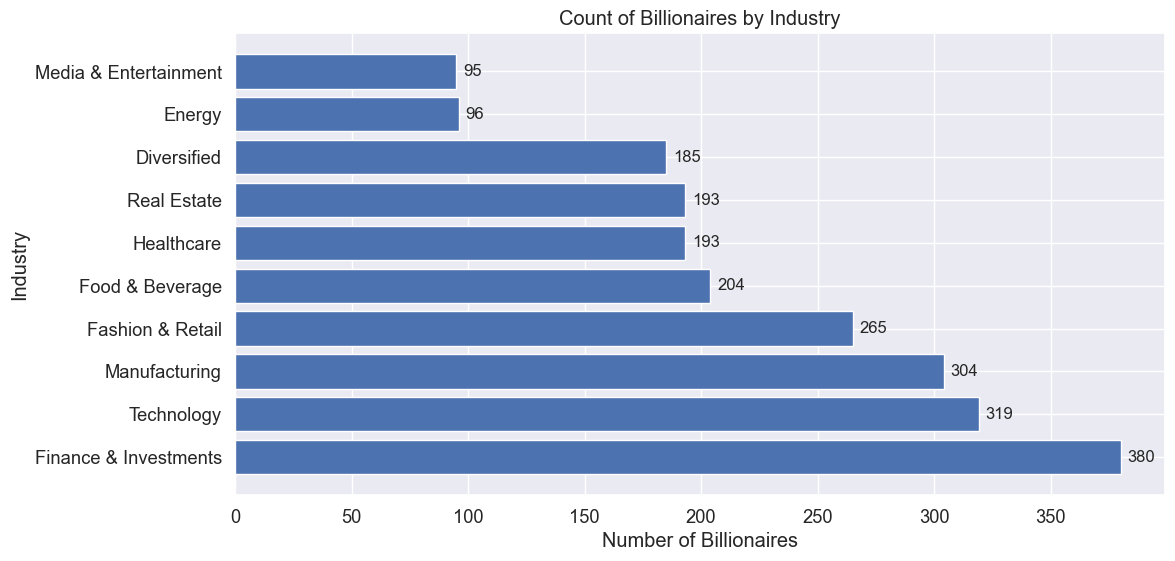

In [45]:
plt.figure(figsize=(12,6))
bar = plt.barh(Industry_count['Industry'], Industry_count['count'])
ax = plt.gca()
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=12, padding=5)
plt.ylabel("Industry")
plt.title('Count of Billionaires by Industry')
plt.xlabel('Number of Billionaires')
plt.show()    

### Conclusion

**Finance & Investments Industry** has the highest Number of Billionaires. Lowest Number of Billionaires are **Media &Entertainment.**

## How does the age of billionaires vary across different industries?

In [46]:
industry_colors = {
    'Automotive': 'red',
    'Fashion & Retail': 'blue',
    'Technology': 'green',
    'Finance & Investments': 'orange',
    'Telecom': 'purple',
    'Diversified': 'brown',
    'Media & Entertainment': 'pink',
    'Food & Beverage': 'gray',
    'Gambling & Casinos': 'cyan',
    'Logistics': 'magenta',
    'Metals & Mining': 'lime',
    'Manufacturing': 'yellow',
    'Real Estate': 'teal',
    'Healthcare': 'gold',
    'Energy': 'navy',
    'Service': 'olive',
    'Construction & Engineering': 'maroon',
    'Sports': 'coral'
}

In [47]:
kde_data = data.dropna()
kde_data['Age'] = kde_data['Age'].astype(int)

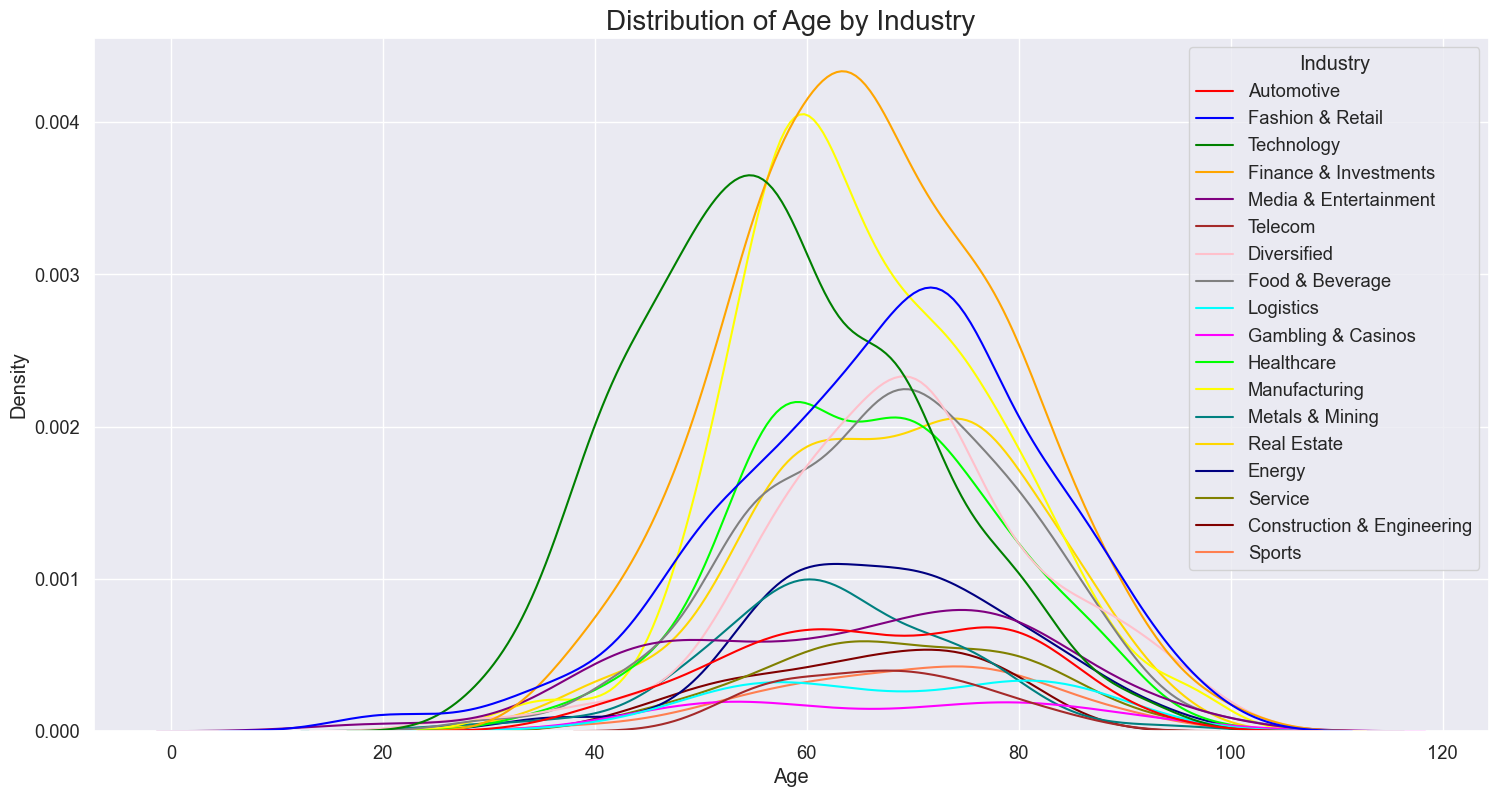

In [48]:
plt.figure(figsize=(18,9))
sns.kdeplot(data=kde_data, x='Age', hue='Industry',palette=industry_colors.values())
plt.title('Distribution of Age by Industry', size=20)
plt.show()

### Conclusion

Insights of the Age of billionaires that vary across different industries are:
   1. The industries with the most billionaires are Finance & Investments, Technology and Manufacturing.
   2. Distribution of Age from technology mostly lies between 20 to 90.
   3. Distribution of Age from Finance & Investments mostly lies between 35 to 100.

## Is there a correlation between the net worth of billionaires and their age? Are older billionaires generally wealthier than younger ones?

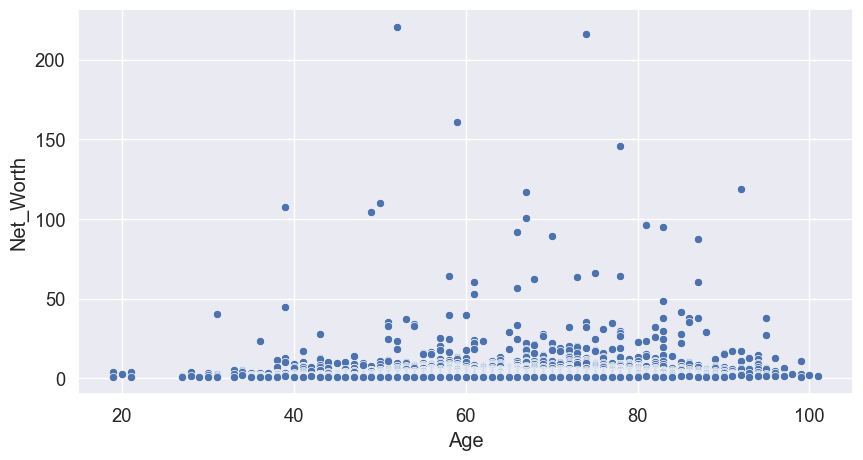

In [49]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = kde_data['Age'], y = kde_data['Net_Worth'])
plt.show()

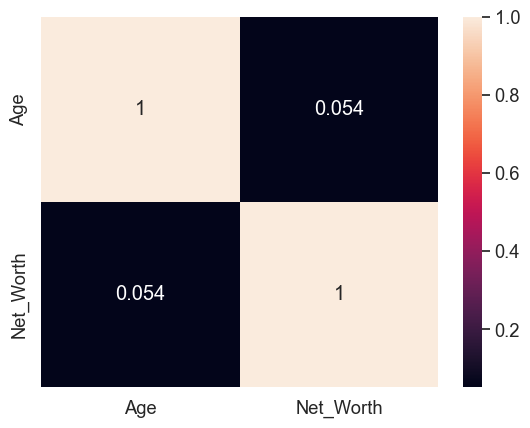

In [50]:
sns.heatmap(data[['Age','Net_Worth']].corr(), annot=True)
plt.show()

### Conclusion

According to scatterplot and heatmap graph, there is no any correlation between Age and Net_Worth. So, I can say, the net_worth of billionaires doesn't rely on Age.
The Correlation between Age and Net_Worth is **0.054**

## Top Richest Women in the World

In [51]:
richest_women = data[data['Sex'] == 'Female'].sort_values('Net_Worth', ascending =False)[['Name','Net_Worth','Source']].head().reset_index()
richest_women.drop(columns='index', inplace=True)
richest_women

Name  Net_Worth            Source
0  Francoise Bettencourt Meyers       89.1           L'Oréal
1                  Alice Walton       63.6           Walmart
2                    Julia Koch       60.2  Koch Industries 
3               Jacqueline Mars       37.8   Candy, pet food
4               MacKenzie Scott       37.0            Amazon

In [52]:
source = richest_women['Source']
worth = richest_women['Net_Worth']

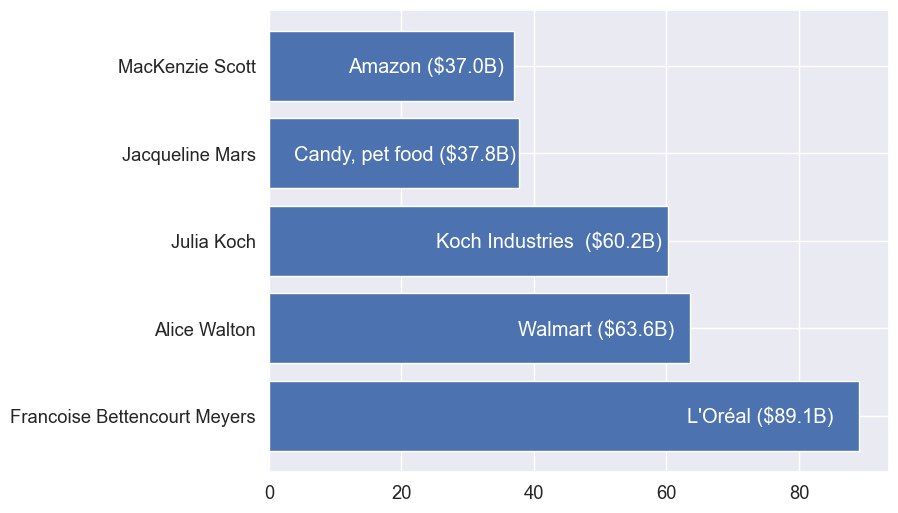

In [53]:
plt.figure(figsize=(8,6))
bars = plt.barh(richest_women['Name'], richest_women['Net_Worth'])
for i, bars in enumerate(bars):
    plt.text(bars.get_width() - len(f'{source[i]} (${worth[i]}B)')-10, bars.get_y() + bars.get_height()/2.5, f'{source[i]} (${worth[i]}B)', color = 'white')
plt.show()

### Conclusion

Richest women in the world is **Francoise Bettencourt Meyers** with 89 billion dollars Net_Worth.

## How many male and female billionaires are there in the world?

In [54]:
sex_data = data['Sex'].value_counts()

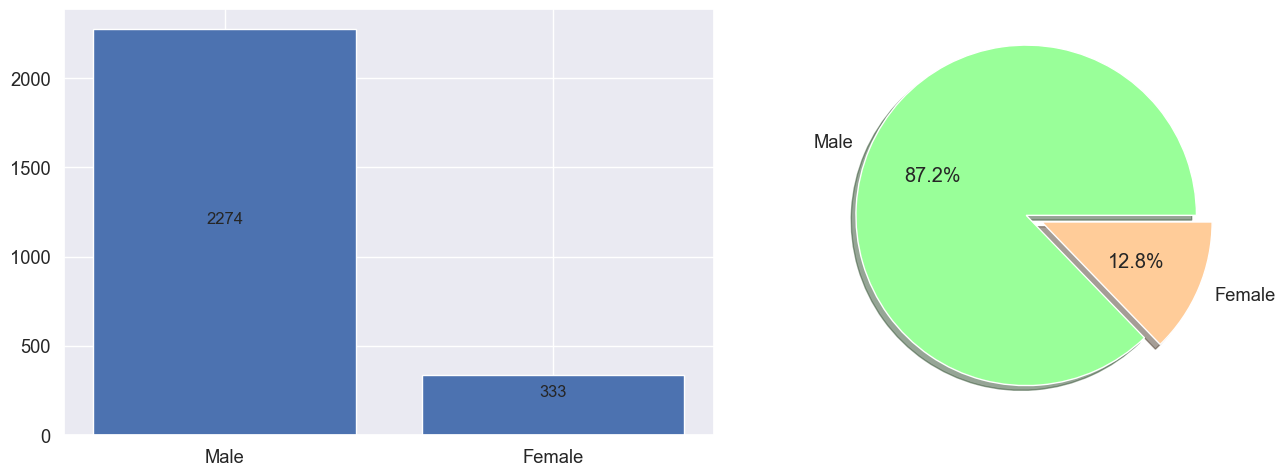

In [55]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.bar(sex_data.index, sex_data.values, )
ax = plt.gca()
for i in ax.containers:
    ax.bar_label(i, label_type='center', fontsize=12, padding=10)
plt.subplot(1,2,2)
explode = [0.1, 0]
colors = ['#99ff99','#ffcc99']
plt.pie(x=sex_data.values, labels=sex_data.index, autopct='%1.1f%%', explode=explode, shadow=True, colors=colors)
plt.tight_layout(w_pad = 2)
plt.show()

### Conclusion

So, there are **2274 males and 333 females** billionaire in the world, which holds **87.2% of male and 12.8% of female**.

## How many male and female billionaires are there in country?

In [56]:
sex_data_country = data.groupby(['Country','Sex'])['Sex'].count().unstack().reset_index().fillna(0)
sex_data_country

Sex         Country  Female   Male
0           Algeria     0.0    1.0
1         Argentina     0.0    5.0
2           Armenia     0.0    1.0
3         Australia     9.0   38.0
4           Austria     0.0   11.0
..              ...     ...    ...
72   United Kingdom     3.0   51.0
73    United States    97.0  659.0
74        Venezuela     0.0    1.0
75          Vietnam     1.0    5.0
76         Zimbabwe     0.0    1.0

[77 rows x 3 columns]

In [57]:
def billionaires_by_sex(Country):
    sex = sex_data_country[sex_data_country['Country'] == Country].columns[1:].values
    sex_val = sex_data_country[sex_data_country['Country'] == Country].values[0][1:]
    plt.figure(figsize=(14,5))
    plt.subplot(1, 2, 1)
    plt.bar(sex, sex_val)
    ax = plt.gca()
    for i in ax.containers:
        ax.bar_label(i, label_type='edge', fontsize=12, padding=10)
    plt.subplot(1,2,2)
    explode = [0.1, 0]
    colors = ['#99ff99','#ffcc99']
    plt.pie(x=sex_val, labels=sex, autopct='%1.1f%%', explode=explode,
            shadow=True, colors=colors)
    plt.tight_layout(w_pad = 2)
    plt.show()
    
country_list = data['Country'].unique()    
widgets.interact(billionaires_by_sex, Country=country_list);

# In some country, Either there is no male billionaire or no female billionaire.
# Graph is show 0 of male or female billionaire,

interactive(children=(Dropdown(description='Country', options=('United States', 'France', 'Mexico', 'India', '…

## By taking net worth of billionaires by industry, which Industry has grown over the year.

In [58]:
industry_wealth_data = wealth_data.merge(data, how='inner', on ='Name').iloc[:,[17,1,2,3,4,5,6,7,8,9,10]]

In [59]:
# to understand the growth of indutry over the time, 
# I have taken worth value of billionaires by each industry and calculated the mean
industry_wealth_data = industry_wealth_data.groupby('Industry').mean()
industry_wealth_data

2014      2015      2016      2017      2018  \
Industry                                                                       
Automotive                  4.200000  4.989655  4.159375  4.712121  4.389362   
Construction & Engineering  2.632143  2.453571  2.013793  2.360714  2.764516   
Diversified                 4.442683  4.414607  3.610204  3.802632  4.281250   
Energy                      4.962963  4.263793  3.864706  4.303333  4.281538   
Fashion & Retail            5.786567  5.565789  4.992810  4.947879  5.932558   
Finance & Investments       3.966667  3.870792  3.455093  3.762661  3.900389   
Food & Beverage             4.385507  4.033663  3.987129  4.212727  4.414844   
Gambling & Casinos          4.142857  3.453333  3.060000  3.556250  4.822222   
Healthcare                  2.901887  3.002740  2.847674  2.838542  3.140187   
Logistics                   4.378571  4.578571  3.322222  3.627273  3.584615   
Manufacturing               3.024359  2.776531  2.762264  3.131200  3.349677   
Media & Entertainment       4.885714  4.975000  4.640351  5.298246  5.410345   
Metals & Mining             5.263043  5.237500  4.236111  5.457778  5.305455   
Real Estate                 3.173103  3.350408  3.323774  3.371860  4.082000   
Service                     2.873529  2.800000  2.650000  3.196000  3.648980   
Sports                      2.173333  2.388235  2.611111  2.800000  3.020000   
Technology                  5.699091  5.839535  5.489209  6.152597  7.084706   
Telecom                     8.000000  8.770588  5.977778  6.331579  6.227273   

                                2019      2020      2021      2022      2023  
Industry                                                                      
Automotive                  3.995455  3.797674  7.870000  8.426154  7.506061  
Construction & Engineering  2.637500  2.400000  2.715789  2.522500  2.685366  
Diversified                 3.978169  3.585106  4.978205  5.315060  4.978235  
Energy                      4.383824  3.430882  4.367073  4.444048  4.906742  
Fashion & Retail            5.752247  5.709605  7.125229  6.856951  6.986026  
Finance & Investments       3.790189  3.530935  4.411963  4.780175  4.596188  
Food & Beverage             3.958741  3.831690  5.287647  4.815642  4.757143  
Gambling & Casinos          4.388889  3.538889  6.019048  4.718182  5.147826  
Healthcare                  2.909483  3.023308  4.163158  3.698324  3.391111  
Logistics                   3.746429  3.260714  4.543333  6.223333  5.439394  
Manufacturing               3.077987  2.871271  3.943922  3.666312  3.475439  
Media & Entertainment       5.077049  4.264179  5.754545  5.306250  5.120988  
Metals & Mining             5.200000  4.711765  6.673016  6.028571  6.486567  
Real Estate                 4.001250  3.632908  4.180696  3.704848  3.556442  
Service                     3.313462  3.376087  4.151852  3.794444  3.567273  
Sports                      3.245455  3.216667  3.404167  3.753846  4.384615  
Technology                  6.677895  6.007834  8.338768  7.343537  6.392281  
Telecom                     5.809091  5.072727  6.191304  6.364000  6.816667

In [60]:
def industry_growth(industry):
    plt.figure(figsize=(10,6))
    industry_worth = industry_wealth_data[industry_wealth_data.index == industry].transpose()
    plt.plot(industry_worth.index, industry_worth[industry])
    plt.xlabel('Year')
    plt.ylabel('Average Worth in billions')
    plt.title('Industry Growth over the Year')
    plt.show()
industry_list = industry_wealth_data.index   
widgets.interact(industry_growth, industry = industry_list);

interactive(children=(Dropdown(description='industry', options=('Automotive', 'Construction & Engineering', 'D…

In [61]:
data['Age'].std()

13.376136688870927

## What is the age distribution of billionaires in the dataset?

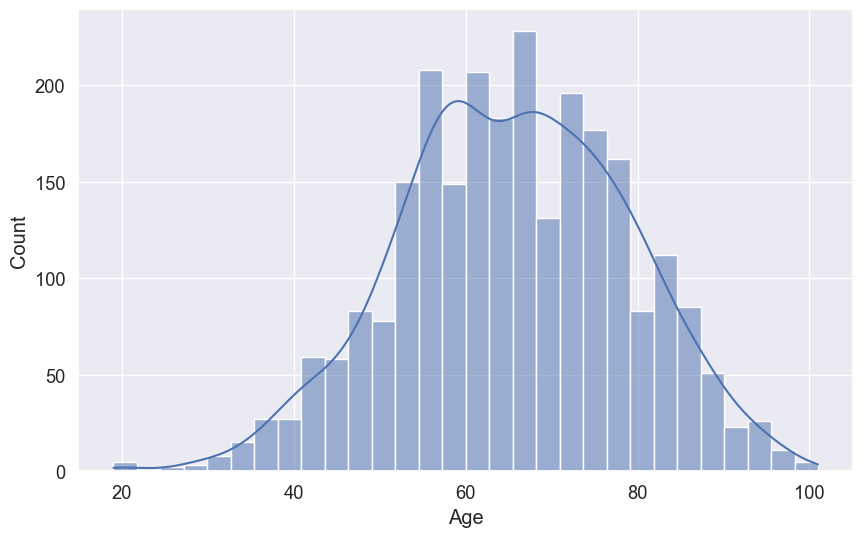

73.76% ages of billionaires lie between 50 and 80.


In [62]:
plt.figure(figsize=(10,6))
sns.histplot(data=data['Age'].dropna().astype(int),kde=True)
plt.show()

mean = data['Age'].mean()
std = data['Age'].std()
def prob_between_ages(age, mean, std):
    return (1 + np.math.erf((age - mean) / (std * np.sqrt(2)))) / 2

probability = prob_between_ages(80, mean, std) - prob_between_ages(50, mean, std)
print(str(round(probability*100, 2))+'% ages of billionaires lie between 50 and 80.')

### conclusion

So, above graph shows the distribution of ages of billionaires. You can see, most of the ages of billionaires lie between 50 and 80.

By looking the graph, data is almost normally distributed, so I calculated probability distribution of ages getting between 50 and 80. I found **74%** ages of billionaires lie between 50 and 80.

## What is the distribution of marital statuses among billionaires?

In [63]:
marital_data = data[data['Marital Status'] != 'no data']['Marital Status'].value_counts()

In [64]:
marital_data

Marital Status
Married               1716
Divorced               146
Widowed                119
Single                  79
In Relationship         18
Widowed, Remarried      11
Separated               10
Engaged                  2
Name: count, dtype: int64

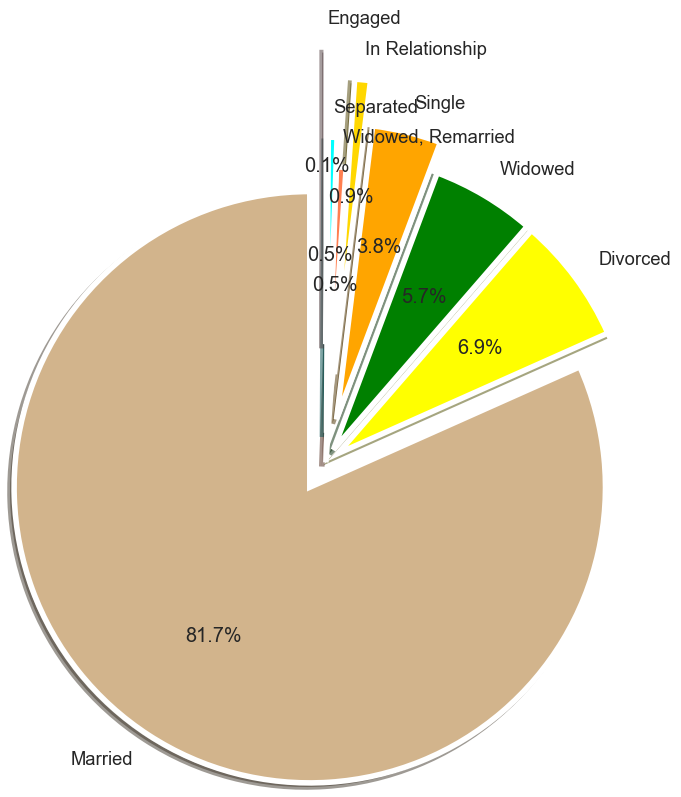

In [65]:
colors=['tan', 'yellow', 'green', 'orange','gold','coral','aqua','pink']
wedge_properties = {'linewidth': 4, 'edgecolor': 'white'}
plt.pie(x = marital_data.values, labels=marital_data.index, 
        shadow=True, radius=2.0, autopct='%1.1f%%', startangle=90,
        colors=colors, explode=(0.2, 0.1, 0.1, 0.3,0.6,0.0,0.2,0.8), wedgeprops=wedge_properties)
plt.show()

### Conclusion

According to data, about **82%** billionaires over the world are married. About **7%** are divorced.

## What are the most common fields of study among billionaires?

In [66]:
data['Education'] = data['Education'].str.strip()

In [67]:
common_study = data[data['Education'] != 'no data']['Education'].value_counts().head()
common_study

Education
Bachelor of Arts/Science             587
Master of Business Administration    178
Master of Science                     91
Drop Out                              81
Bachelor of Science                   49
Name: count, dtype: int64

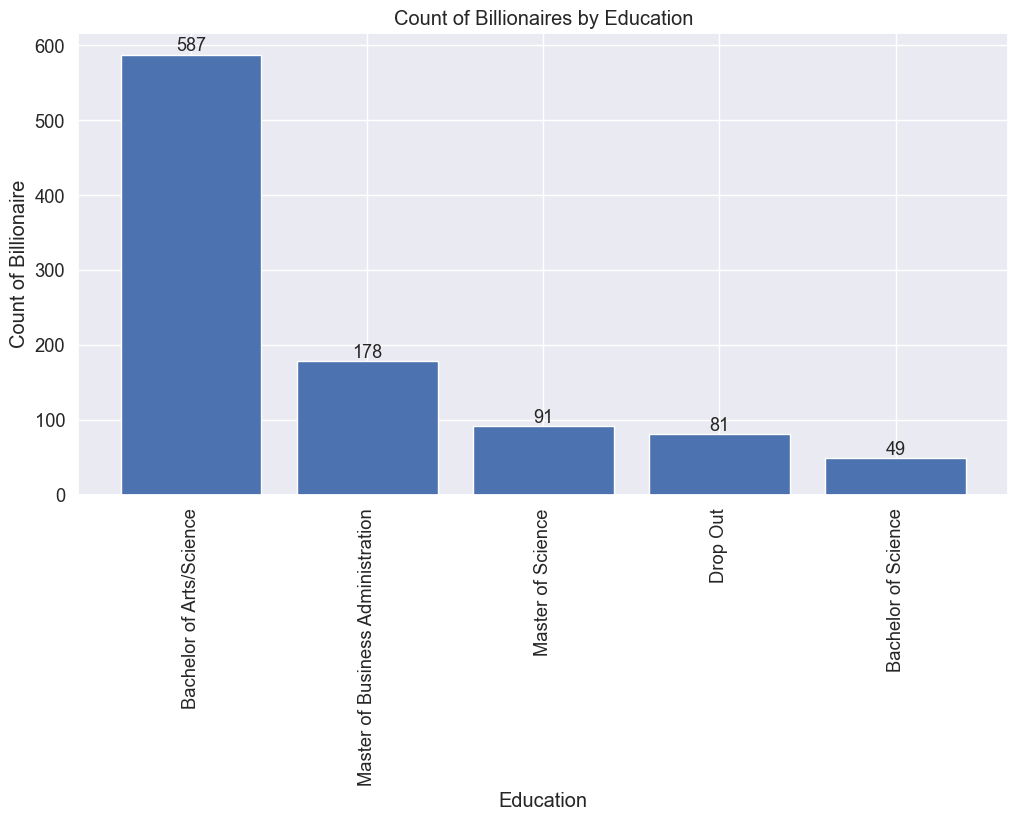

In [68]:
plt.figure(figsize=(12,6))
plt.bar(common_study.index, common_study.values)
plt.xticks(rotation='vertical')
ax = plt.gca()
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=13)
plt.xlabel('Education')    
plt.ylabel('Count of Billionaire')
plt.title('Count of Billionaires by Education')
plt.show()

### Conclusion

The most common fields of study among billonaires are **Science and Business Administation** Education. Some are Drop Out also.

## Which colleges or universities have produced the most billionaires?

In [69]:
data[data['College/University'] != 'no data']['College/University'].value_counts().head(1)

College/University
Harvard University    49
Name: count, dtype: int64

### Conclusion

**Harvard University** has produced the most billionaires in the world. i.e. **49**

## Number of Male and Female billionaires in each Country.

In [70]:
sex_by_country = pd.crosstab(index = data['Country'], columns= data['Sex'], values =data['Sex'], aggfunc='count')
sex_by_country = sex_by_country.fillna(0).astype('int')

In [71]:
sex_by_country

Sex             Female  Male
Country                     
Algeria              0     1
Argentina            0     5
Armenia              0     1
Australia            9    38
Austria              0    11
...                ...   ...
United Kingdom       3    51
United States       97   659
Venezuela            0     1
Vietnam              1     5
Zimbabwe             0     1

[77 rows x 2 columns]

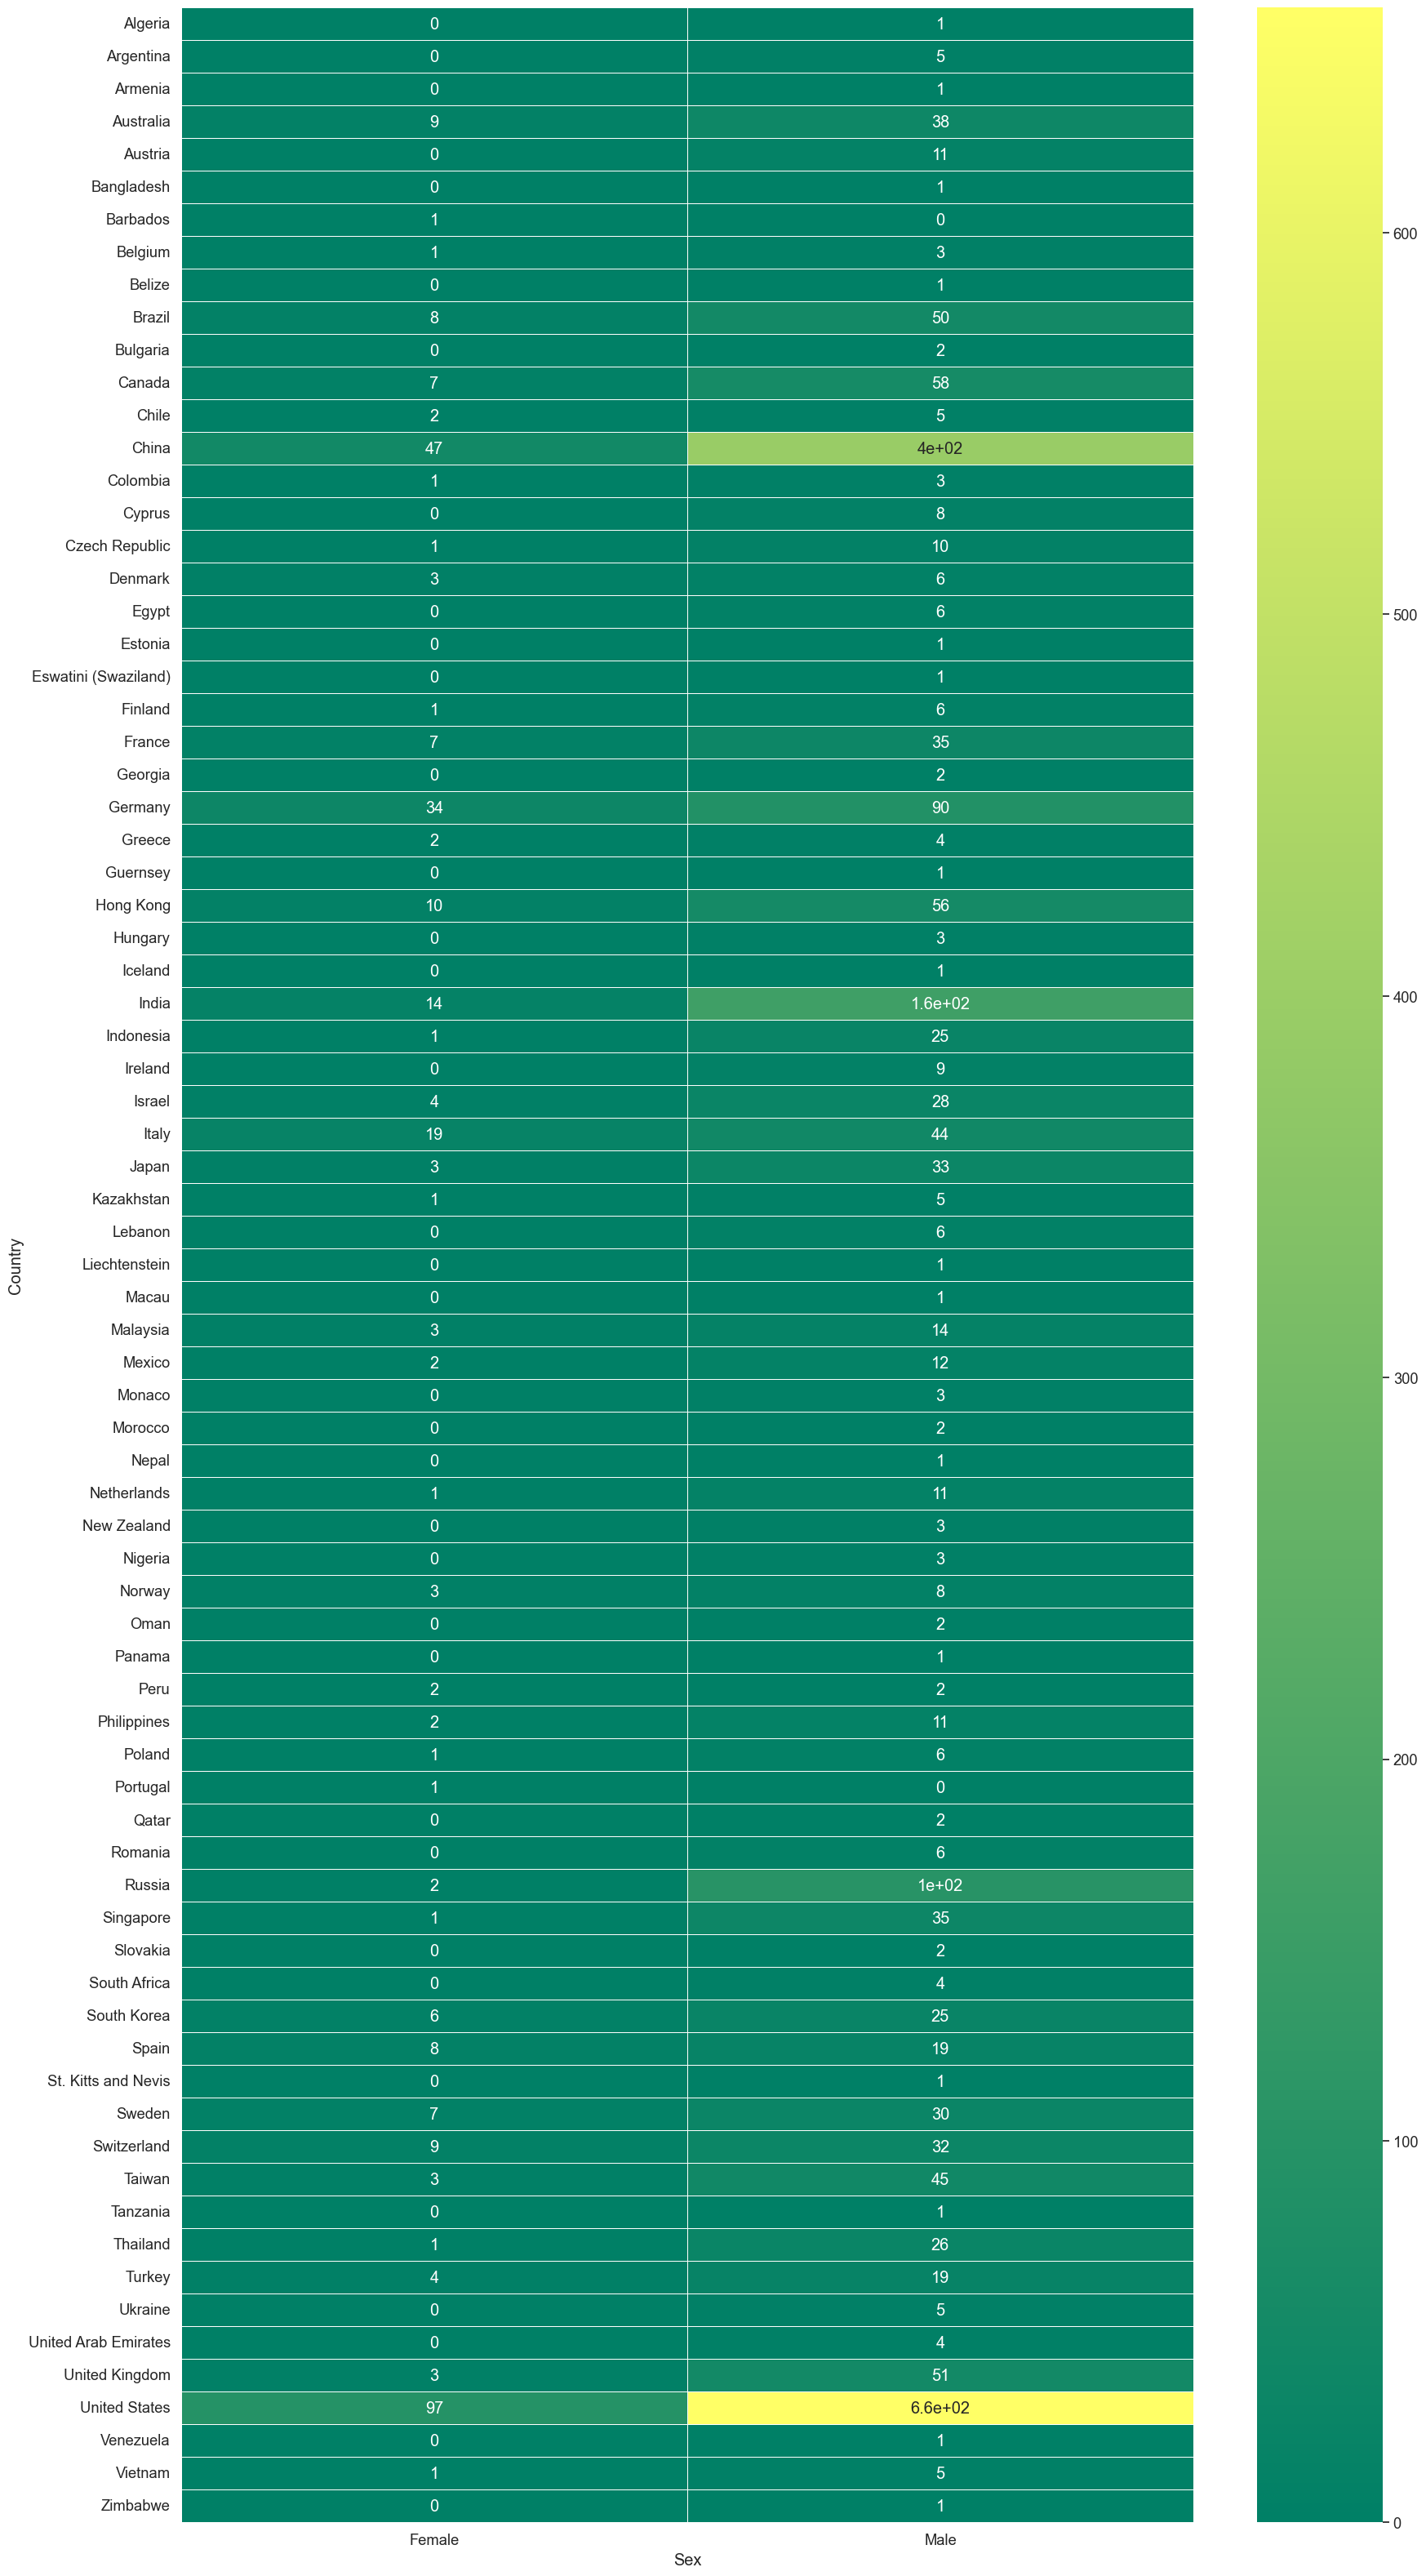

In [72]:
plt.figure(figsize=(20,40))
sns.heatmap(sex_by_country, annot=True, linewidths=0.5,cmap='summer', )
plt.show()

# Thank You